## 데이터 불러오기
- 정형화된 데이터는 pandas 로 바로 불러올 수 있음
- pd.read_csv(): 파일로 저장된 데이터를 DataFrame형태로 불러옴
- dacon 아파트 실 거래가 <br>
https://dacon.io/cpt4/22604

In [2]:
#### dacon apt 
import pandas as pd
train = pd.read_csv('../train.csv')
print(train.shape)
test = pd.read_csv('../test.csv')
print(test.shape)
data = pd.concat([train,test],axis=0)
display(data.head())
data.shape

(1601458, 25)
(3918, 25)


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


(1605376, 25)

In [3]:
data.dtypes

key                                     int64
apartment_id                            int64
city                                    int64
transaction_year_month                  int64
transaction_date                       object
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
address_by_law                          int64
total_parking_capacity_in_site        float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
tallest_building_in_sites             float64
lowest_building_in_sites              float64
heat_type                              object
heat_fuel                              object
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type      int64
room_count                        

## 데이터 탐색하기(시각화)

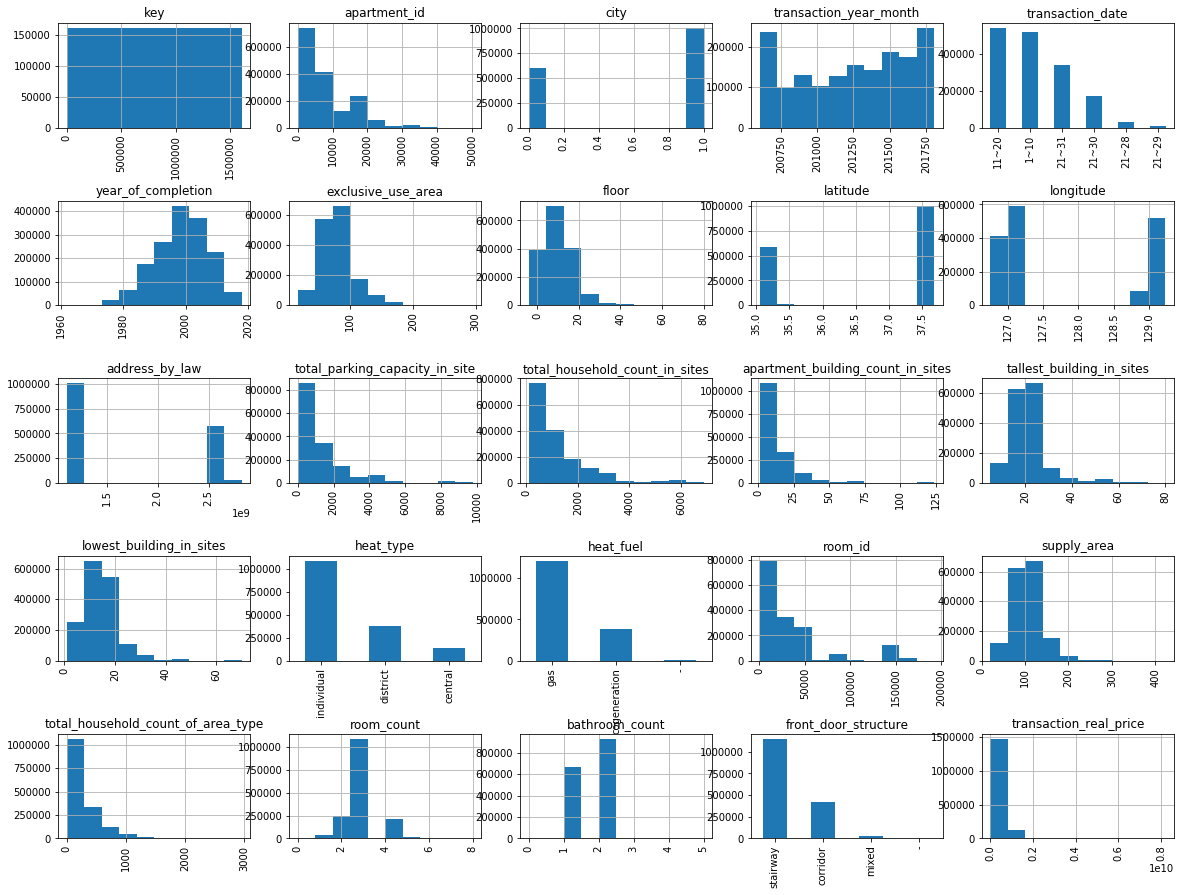

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)